<a href="https://colab.research.google.com/github/JuliaVazTostes/curso_data_science/blob/master/M%C3%B3dulo_2_Visualiza%C3%A7%C3%A3o_de_Dados_com_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de Dados com Pandas

Visualização de dados é algo muito importante para um projeto de *Data Science*.

Apesar de termos o Módulo 3 totalmente dedicado a essa finalidade, queria dar uma breve introdução de como o próprio Pandas é capaz de plotar gráficos a partir de um *DataFrame*.

Como exemplo, vamos importar mais uma vez os dados da ação BBAS3 do `csv`. No entanto, desta vez vamos fazer uma coisa diferente.

Como cada linha representa um dia de pregão da Bolsa de Valores, faz sentido que nosso índice (*index*) seja a coluna `Date`. Também quero que o Pandas leia essa coluna como sendo uma data, convertendo `strings` do tipo `2018-09-21` em variáveis do tipo `datetime`.

In [2]:
# importar pandas
import pandas as pd

# importar o arquivo csv para o Pandas
# parse_dates=True -> Transforma uma String (mesmo que pareça uma data é uma string - Formato de data é datetime) em data.

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/BBAS3.SA.csv")
                
# ver as primeiras entradas
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-21,29.730000,30.580000,29.340000,30.580000,28.680056,16301600
1,2018-09-24,30.379999,30.700001,29.500000,29.730000,27.882866,13086900
2,2018-09-25,29.030001,29.760000,28.809999,29.549999,27.714045,11742900
3,2018-09-26,29.650000,29.969999,29.209999,29.450001,27.620264,12842400
4,2018-09-27,29.680000,30.299999,29.680000,30.290001,28.408072,8767900


In [3]:
# Transformar tipo da variável 'Date' e a colocar como índice
# parse_dates=True -> Transforma uma String (mesmo que pareça uma data é uma string - Formato de data é datetime) em data.

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/BBAS3.SA.csv",
                parse_dates=True, index_col='Date')

# ver as primeiras entradas
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-21,29.730000,30.580000,29.340000,30.580000,28.680056,16301600
2018-09-24,30.379999,30.700001,29.500000,29.730000,27.882866,13086900
2018-09-25,29.030001,29.760000,28.809999,29.549999,27.714045,11742900
2018-09-26,29.650000,29.969999,29.209999,29.450001,27.620264,12842400
2018-09-27,29.680000,30.299999,29.680000,30.290001,28.408072,8767900


In [4]:
# o index se tornou um datetime
df.index

DatetimeIndex(['2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28', '2018-10-01', '2018-10-02',
               '2018-10-03', '2018-10-04',
               ...
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

## Gráfico de Linhas

Vamos supor que você quisesse visualizar como foram as máximas das ações do Banco do Brasil.

Vimos lá atrás que é possível selecionar apenas uma coluna de um *DataFrame*. Neste exemplo, vou selecionar a variável `High` usando `df['High']'.

Em seguida, a unica coisa que eu faço é executar o método `plot()`

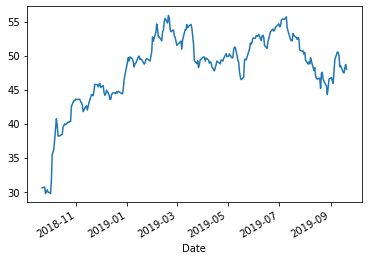

In [5]:
df['High'].plot();

In [6]:
# O x só fica, automaticamente como o eixo x por que é o índice, por isso não precisa falar o que será o x e o que será o y. Por default o x é o índice e o y
# é o 'High' que coloquei na função plot.

df['High']

Date
2018-09-21    30.580000
2018-09-24    30.700001
2018-09-25    29.760000
2018-09-26    29.969999
2018-09-27    30.299999
                ...    
2019-09-16    47.560001
2019-09-17    47.450001
2019-09-18    48.250000
2019-09-19    48.700001
2019-09-20    47.980000
Name: High, Length: 246, dtype: float64

## Histograma

Quando se quer ter uma noção de quantas vezes uma determinada informação aparece no conjunto de dados, plotar o histograma pode ser de grande valor - Mostra bem a frequência com que os valores aparecem no dataframe.

Histogramas são uma das principais ferramentas da estatística para extrair informações sobre frequencia e distribuição dos nossos dados. Ele é conceitualmente bem simples. Se você nunca teve contato com esse tipo de gráfico, recomendo assistir a [este vídeo da Khan Academy](https://www.youtube.com/watch?v=L0f8d3B8dk4).

Vamos plotar o histograma do volume movimentado para as ações do BBAS3.

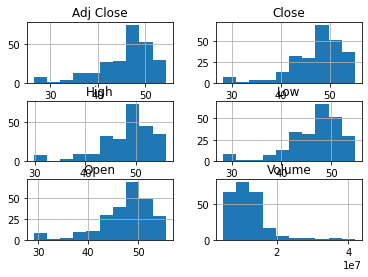

In [11]:
# plotar histograma das variáveis

df.hist();

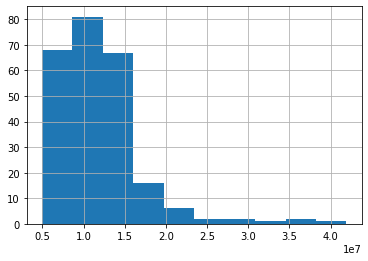

In [7]:
# estudar o histograma do volume - como exemplo

df['Volume'].hist();

In [0]:
# Basicamente, esse gráfico nos fala onde estão concentrados os valores de volume, onde a maioria dos dados apresenta volume de 1, depois de 0,5 e 1,5 e assim
# por diante. Dá uma boa ideia de valores estatísticos, como média...

## Gráfico de Dispersão (*Scatter Plot*)

O gráfico de dispersão é um gráfico ideal para ver a correlação entre duas variáveis quaisquer.

Serve não apenas para mostrar quanto uma variável é afetada por outra, mas também para plotar coordenadas geográficas (como foi feito no projeto do Módulo 1).

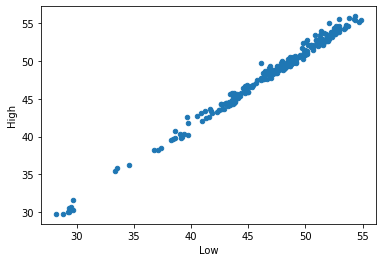

In [9]:
# plotar gráfico de dispersão entre as máximas e mínimas - começar a ver a correlação

df.plot.scatter('Low', 'High');

## Boxplot

Boxplot é um dos tipos de gráficos que conseguem fornecer o maior número de informações estatísticas de uma vez só.

<center><img src="https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png" height="200px"></center>

É possível ter em uma imagem os valores máximos, mínimos, quartis e mediana. *Outliers* também são representados como pontos acima do valor máximo ou abaixo do valor mínimo

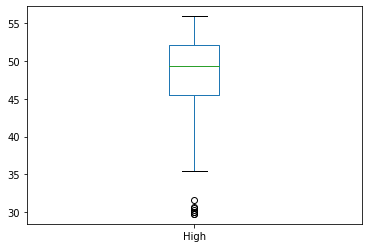

In [10]:
# plotar o boxplot para os valores máximos da ação
# High é a coluna da qual será feito o boxplot

df.High.plot(kind="box");